### Question2
- The graph used here represents the network of wikipedia votes.
- This is a directed unweighted graph.
- The Link for reference for the network is: https://snap.stanford.edu/data/wiki-Vote.html



Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

Making the Data frame from wikipedia_vote_network.csv file which was generated from wikipedia_vote_network.txt file.

In [2]:
file_path = "wikipedia_vote_network.csv"
df = pd.read_csv(file_path)

Printing the Data frame.

In [3]:
df

,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478
...,...,...
103684,8272,4940
103685,8273,4940
103686,8150,8275
103687,8150,8276


Initializing Dictionaries for In-Degree and Out-Degree

in_degree: Stores the count of incoming edges for each node.

out_degree: Stores the count of outgoing edges for each node.

Both dictionaries are initialized with defaultdict(int), meaning if a key (node) does not exist, it starts with a value of 0.


In [4]:
in_degree = defaultdict(int)
out_degree = defaultdict(int)

Iterating Through the DataFrame to Compute Degrees

Iterates over each row of the DataFrame.
from_node represents the starting node of a directed edge.
to_node represents the ending node of a directed edge.
out_degree[from_node] += 1: Increments the count of outgoing edges for from_node.
in_degree[to_node] += 1: Increments the count of incoming edges for to_node.

In [5]:
for index, row in df.iterrows():
    from_node, to_node = row["FromNodeId"], row["ToNodeId"]
    out_degree[from_node] += 1
    in_degree[to_node] += 1

Converts the in_degree and out_degree dictionaries into Pandas DataFrames.

In [6]:
in_degree_df = pd.DataFrame(in_degree.items(), columns=["NodeId", "InDegree"])
out_degree_df = pd.DataFrame(out_degree.items(), columns=["NodeId", "OutDegree"])

Plotting In-Degree Distribution

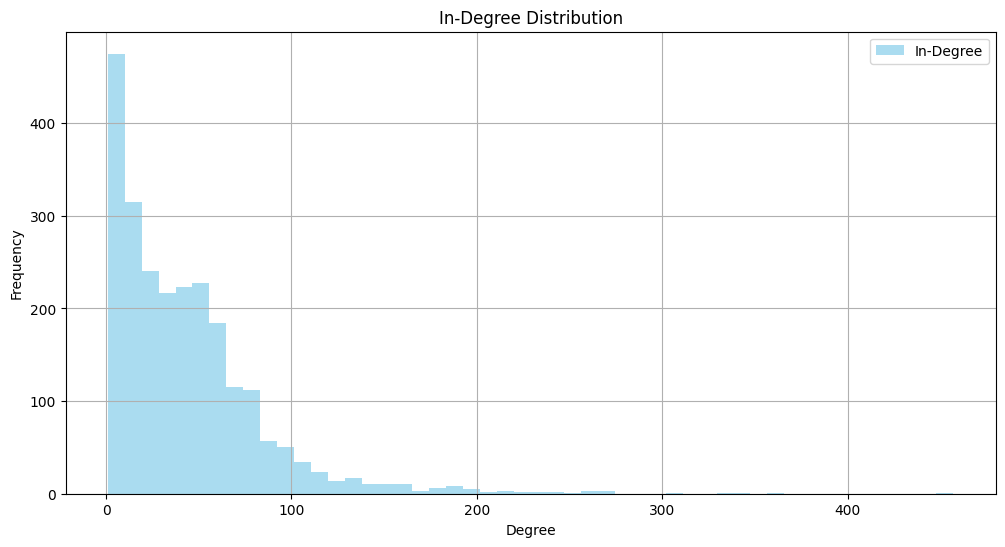

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(in_degree.values(), bins=50, color='skyblue', alpha=0.7, label="In-Degree")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("In-Degree Distribution")
plt.legend()
plt.grid(True)
plt.savefig('q2_in_degree_distribution.png', dpi=1000, bbox_inches='tight') 
plt.show()

Plotting Out-Degree Distribution

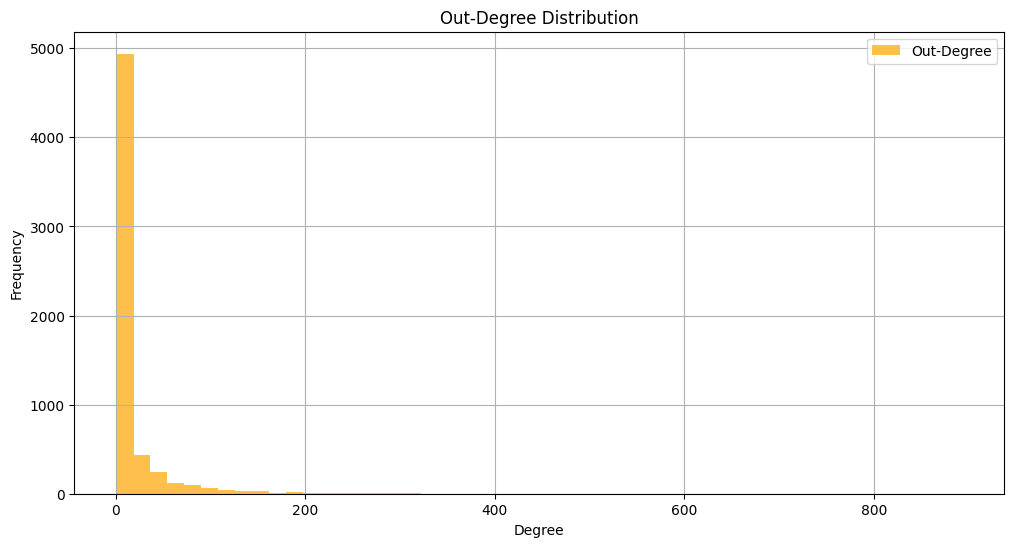

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(out_degree.values(), bins=50, color='orange', alpha=0.7, label="Out-Degree")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Out-Degree Distribution")
plt.legend()
plt.grid(True)
plt.savefig('q2_out_degree_distribution.png', dpi=1000, bbox_inches='tight') 
plt.show()